<a href="https://colab.research.google.com/github/Sameer-ansarii/AID_ALLOCATION_ANALYSIS/blob/main/Dog_Vs_Cat_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Connecting through API Key

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
# Download Dataset from kaggle through API (Application Programming Interface)

!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:49<00:00, 23.6MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.1MB/s]


In [ ]:
# Extract all folders and files from Zip File

import zipfile
zip_rfe = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_rfe.extractall('/content')
zip_rfe.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/dogs-vs-cats.zip' mode='r'>>

In [ ]:
# importing requird libraries

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Training dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory="/content/train",
    labels='inferred', # Automatically infer class labels from subdirectory names
    label_mode='int',  # Represent class labels as integers
    batch_size=32,
    image_size=(256, 256),
)

# Validation dataset
validation_ds =  keras.utils.image_dataset_from_directory(
    directory="/content/test",
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
)

# The parameter batch_size=32 in the code represents the number of samples (data points) that will be processed together in one forward and backward pass during each training iteration.

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize dataset

def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

# Apply the process function to the training dataset
train_ds = train_ds.map(process)

# Apply the process function to the validation dataset
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))
model.add(BatchNormalization())

model.add(Conv2D(64, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(128, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Conv2D(256, kernel_size=(3, 3), padding="valid", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding="valid"))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
# Compile the model
model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Fit the model to the training data and validate on the validation data
history = model.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 80s 102ms/step - loss: 1.0063 - accuracy: 0.6062 - val_loss: 0.5701 - val_accuracy: 0.7116
Epoch 2/20
625/625 [==============================] - 66s 106ms/step - loss: 0.5383 - accuracy: 0.7278 - val_loss: 0.5593 - val_accuracy: 0.6986
Epoch 3/20
625/625 [==============================] - 66s 104ms/step - loss: 0.4601 - accuracy: 0.7876 - val_loss: 0.5181 - val_accuracy: 0.7386
Epoch 4/20
625/625 [==============================] - 64s 102ms/step - loss: 0.3812 - accuracy: 0.8335 - val_loss: 0.4024 - val_accuracy: 0.8150
Epoch 5/20
625/625 [==============================] - 64s 102ms/step - loss: 0.2977 - accuracy: 0.8738 - val_loss: 0.3087 - val_accuracy: 0.8648
Epoch 6/20
625/625 [==============================] - 66s 104ms/step - loss: 0.2211 - accuracy: 0.9076 - val_loss: 0.3972 - val_accuracy: 0.8270
Epoch 7/20
625/625 [==============================] - 64s 102ms/step - loss: 0.1510 - accuracy: 0.9385 - val_loss: 0.4693 - val_ac

**During training, the model updates its parameters (weights and biases) using the training dataset (train_ds). The reported accuracy and loss values are computed after each epoch during the training process.**



In [ ]:
# Evaluate model on the training dataset
train_loss, train_accuracy = model.evaluate(train_ds)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)
print(f"Validation Loss: {validation_loss:.4f}")
print(f"Validation Accuracy: {validation_accuracy:.4f}")

625/625 [==============================] - 37s 59ms/step - loss: 0.1165 - accuracy: 0.9616
Training Loss: 0.1165
Training Accuracy: 0.9616
157/157 [==============================] - 10s 58ms/step - loss: 0.6449 - accuracy: 0.8618
Validation Loss: 0.6449
Validation Accuracy: 0.8618


**Evaluating model on the training and validation datasets, respectively. In evaluation mode, the model doesn't update its parameters; it only calculates predictions based on the current model weights. The reported accuracy and loss values are computed for the entire dataset without updating the model's parameters.**


**There is a difference of approximately 10% between the training and validation accuracy after trainning. We can say that there is minimal overfitting in this case.**

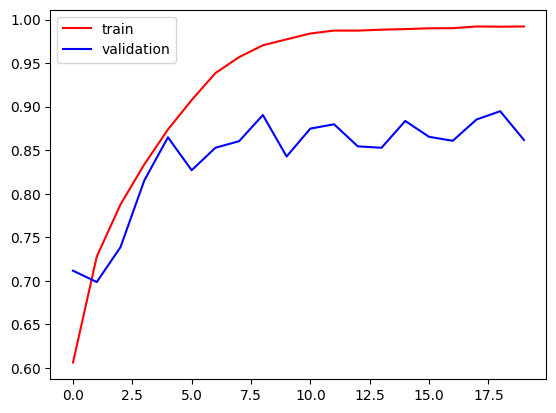

In [ ]:
# Making graph of training and validation accuracy

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color='red', label='train')
plt.plot(history.history["val_accuracy"], color='blue', label='validation')
plt.legend()
plt.show()


**The training accuracy is continuously increasing, but the validation accuracy remains consistent between 0.85 and 0.90.**

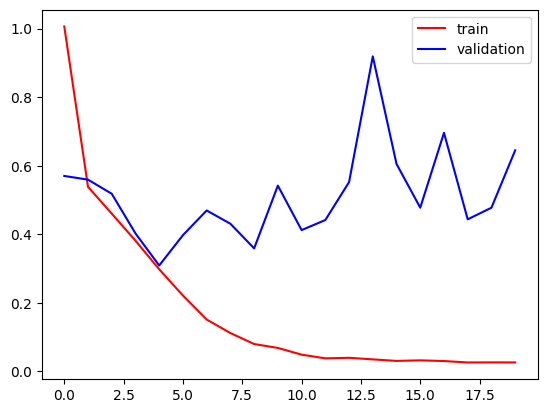

In [ ]:
plt.plot(history.history["loss"], color='red', label='train')
plt.plot(history.history["val_loss"], color='blue', label='validation')
plt.legend()
plt.show()

**The training loss is continuously decreasing, but the validation loss is not stable.**

# Out of time Validation

**Out-of-time validation (OTV) is a technique used to evaluate the performance of a machine learning or deep learning model on data that was not seen during training.**

In [ ]:
import cv2

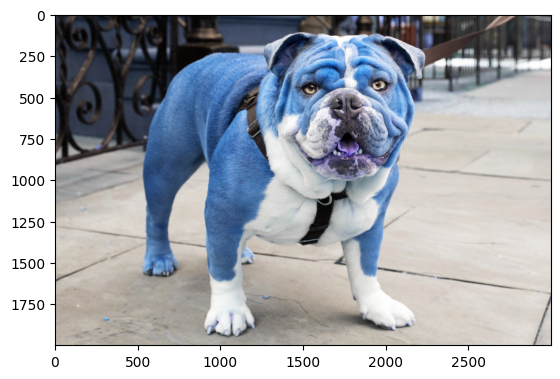

In [ ]:
test_img = cv2.imread('/content/english-dog-breeds-4788340-hero-14a64cf053ca40f78e5bd078b052d97f.jpg')
plt.imshow(test_img)

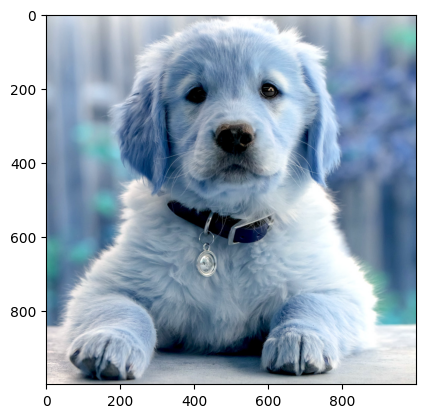

In [ ]:
test_img2 = cv2.imread('/content/golder-retriever-puppy.jpeg')
plt.imshow(test_img2)

In [ ]:
# Checking Shapes of images

test_img.shape, test_img2.shape

((1999, 3000, 3), (1000, 1000, 3))

In [ ]:
# Resize images

test_img = cv2.resize(test_img,(256,256))
test_img2 = cv2.resize(test_img2,(256,256))

In [ ]:
# Reshshape images becuase expected input shape of image is (None, 256, 256, 3)

test_input = test_img.reshape(1,256,256,3)
test_input2 = test_img2.reshape(1,256,256,3)

In [ ]:
model.predict(test_input) , model.predict(test_input2)

1/1 [==============================] - 0s 22ms/step


(array([[1.]], dtype=float32), array([[1.]], dtype=float32))

**In the model's classification, 0 class corresponds to "cat," and 1 class corresponds to "dog." The model correctly predicts images of dogs for the 1 class.**